In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



import plotly.express as px
from scipy.stats import iqr
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [ ]:
df = pd.read_csv("/content/drive/Othercomputers/My Laptop/Apziva Projects/Term Deposit Marketing/term-deposit-marketing-2020.csv")
df.describe(include = 'all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
count,40000.000000,40000,40000,40000,40000,40000.000000,40000,40000,40000,40000.000000,40000,40000.000000,40000.000000,40000
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,11,NaN,NaN,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,no
freq,NaN,9383,24386,20993,39191,NaN,24031,33070,24914,NaN,13532,NaN,NaN,37104
mean,40.544600,NaN,NaN,NaN,NaN,1274.277550,NaN,NaN,NaN,16.017225,NaN,254.824300,2.882175,NaN
std,9.641776,NaN,NaN,NaN,NaN,2903.769716,NaN,NaN,NaN,8.278127,NaN,259.366498,3.239051,NaN
min,19.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,NaN
25%,33.000000,NaN,NaN,NaN,NaN,54.000000,NaN,NaN,NaN,8.000000,NaN,100.000000,1.000000,NaN
50%,39.000000,NaN,NaN,NaN,NaN,407.000000,NaN,NaN,NaN,17.000000,NaN,175.000000,2.000000,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1319.000000,NaN,NaN,NaN,21.000000,NaN,313.000000,3.000000,NaN


In [ ]:
df.info()
df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
39995,53,technician,married,tertiary,no,395,no,no,cellular,3,jun,107,1,no
39996,30,management,single,tertiary,no,3340,no,no,cellular,3,jun,238,3,yes
39997,54,admin,divorced,secondary,no,200,no,no,cellular,3,jun,170,1,yes
39998,34,management,married,tertiary,no,1047,no,no,cellular,3,jun,342,1,no
39999,38,technician,married,secondary,no,1442,yes,no,cellular,3,jun,113,1,no


In [ ]:
len(df) - len(df.drop_duplicates())

0

**Observations:**



1.  No dupicates and null values.
2.  There are 4000 unique records with below attributes.
3.  There are lot of object datatypes.


**Attributes:**

    age : age of customer (numeric)
    job : type of job (categorical)
    marital : marital status (categorical)
    education (categorical)
    default: has credit in default? (binary)
    balance: average yearly balance, in euros (numeric)
    housing: has a housing loan? (binary)
    loan: has personal loan? (binary)
    contact: contact communication type (categorical)
    day: last contact day of the month (numeric)
    month: last contact month of year (categorical)
    duration: last contact duration, in seconds (numeric)
    campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
    Output (desired target): y - has the client subscribed to a term deposit? (binary)


In [ ]:
#converting dependant variable to numerical

df['y'] = df['y'].str.replace('yes','1').str.replace('no','0').astype(int)



# df['default'] = df['default'].str.replace('yes','1').str.replace('no','0').astype(int)
# df['housing'] = df['housing'].str.replace('yes','1').str.replace('no','0').astype(int)
# df['loan'] = df['loan'].str.replace('yes','1').str.replace('no','0').astype(int)


# EDA

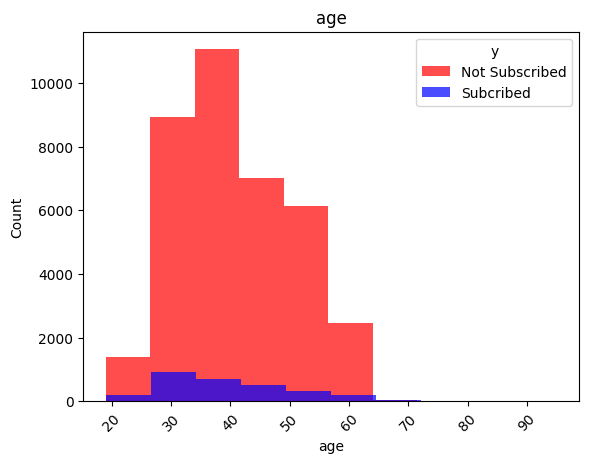

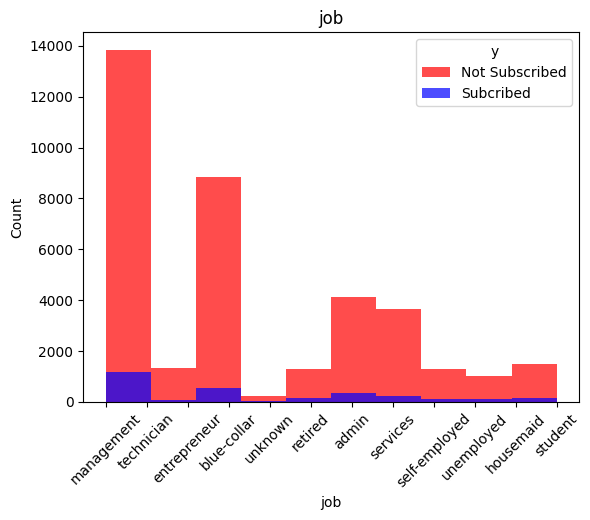

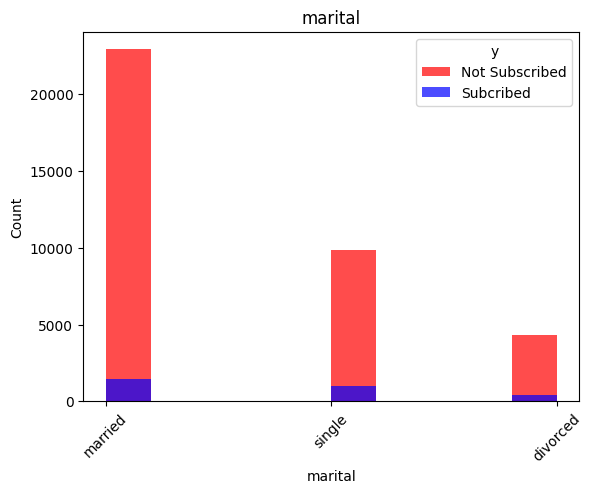

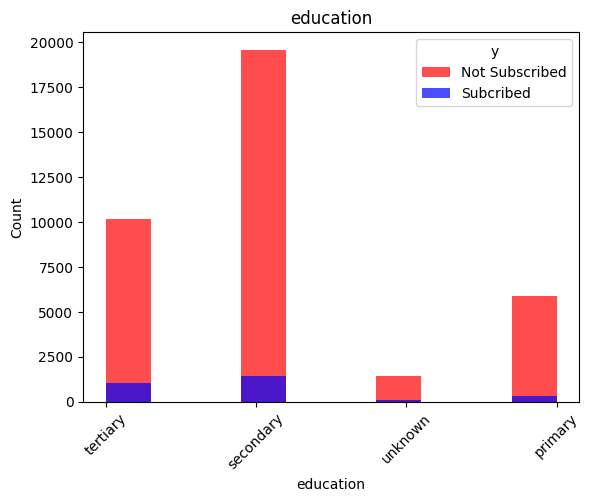

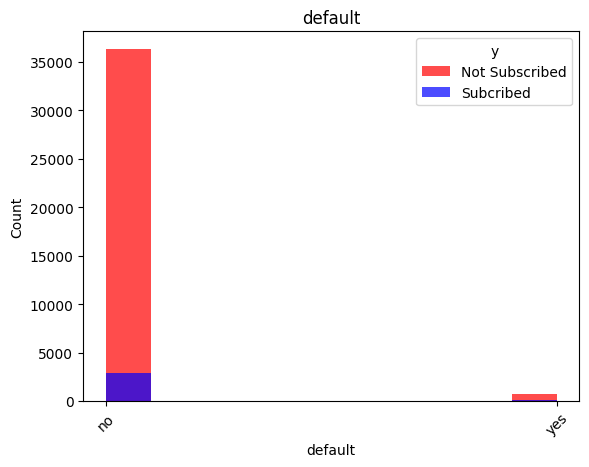

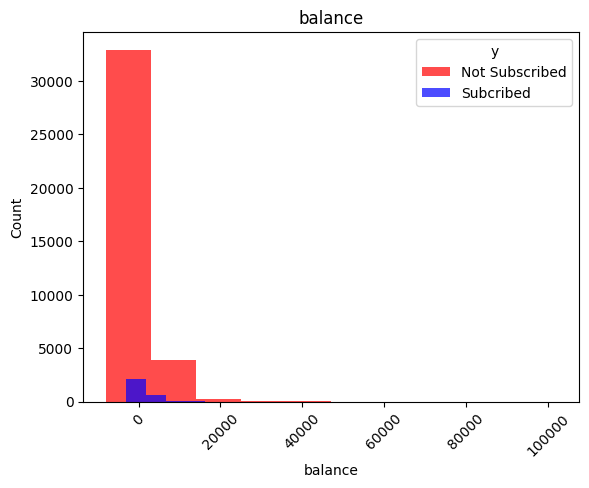

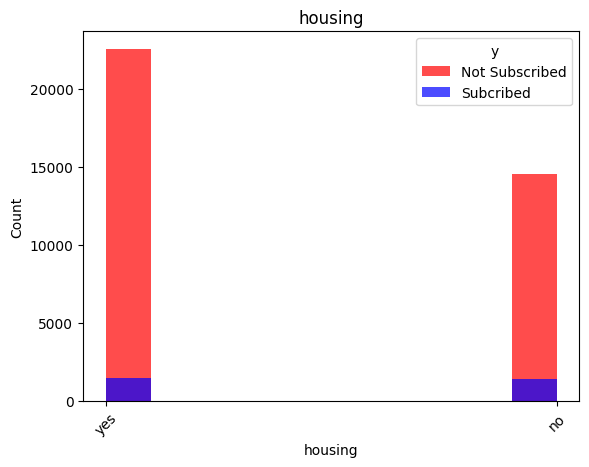

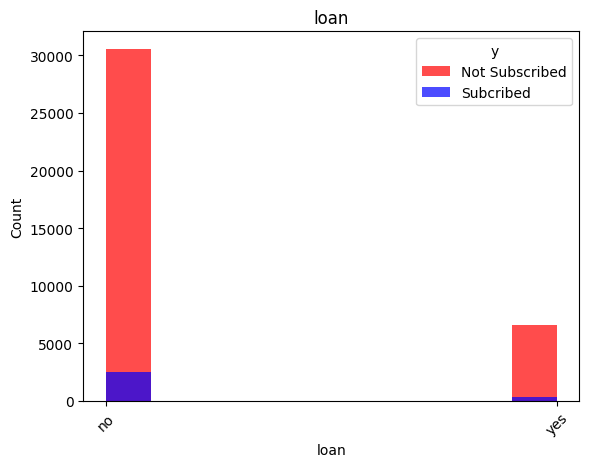

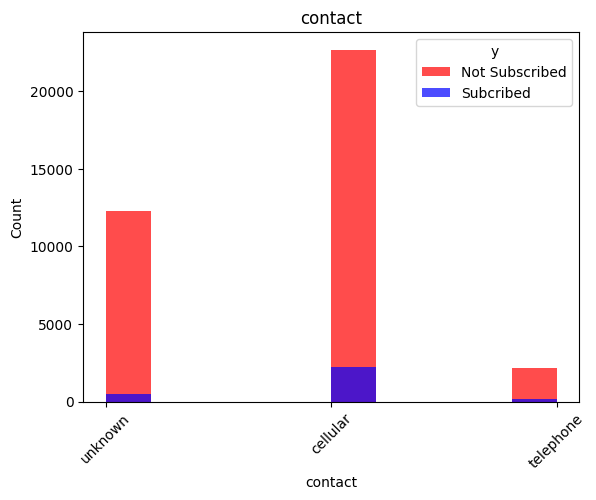

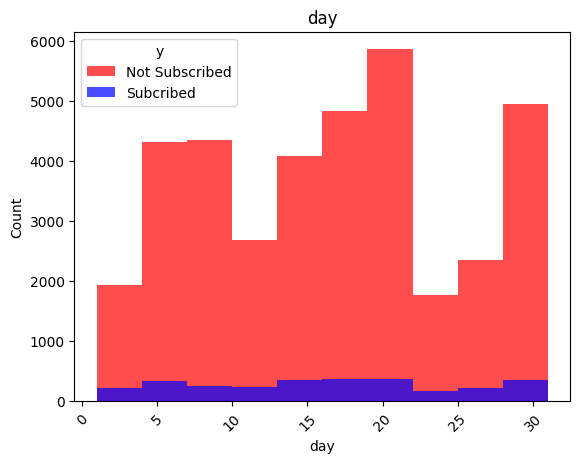

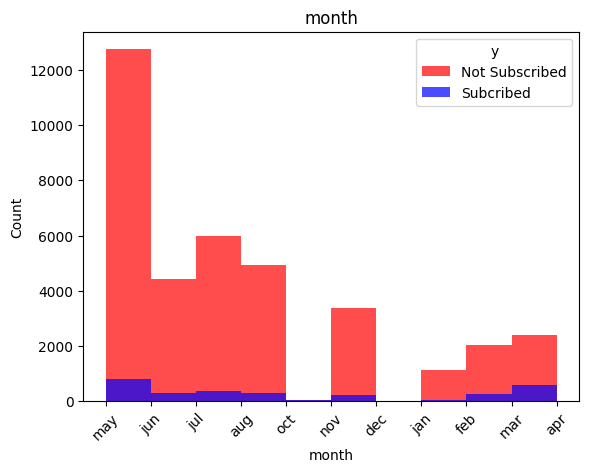

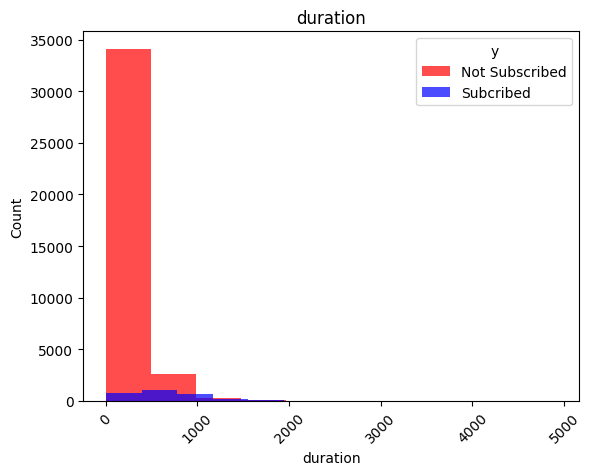

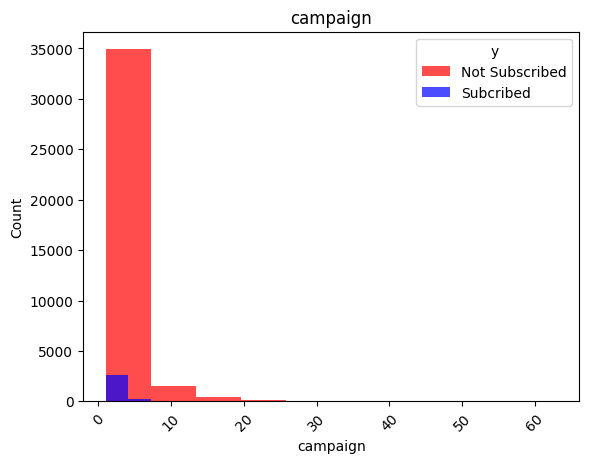

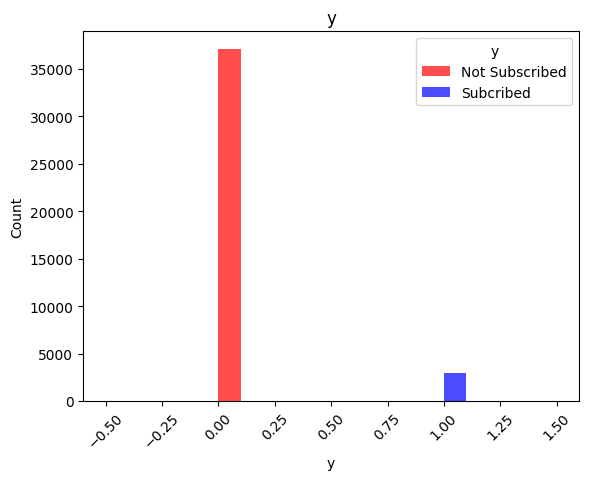

In [ ]:

def hist(df):
  for feature in df.columns:
    #plt.hist(df[feature])
    plt.hist(df[df["y"]==0][feature], color='red', label ='Not Subscribed', alpha = 0.7, density = False)
    plt.hist(df[df["y"]==1][feature], color='blue', label ='Subcribed', alpha = 0.7, density =False)
    plt.title(feature)
    plt.ylabel("Count")
    plt.xlabel(feature)
    plt.xticks(rotation=45)
    plt.legend(title = 'y')
    plt.show()


hist(df)

**Histogram Observation:**


1.  The Data is skewed towards 'No'. Data is highly Imbalanced. Very small % of customers have subscribed to term deposit.
2.  Most of the customers age distribution is within the range 30-50.
3.  Majority of the customers fall under jobcategory of Admin, Blue-collar and Service  
4. Majority of the customers are Married
5. Majority of the customers are having Secondary Education
6. Majority of the customers do not have default their Credit
7. Majority of the customers keep low average yearly balance between range 0 - 10000 euro (Requires high granularity to further analyse the distrubution of balance - smaller bins)
8. Majority of the customers have housing loans.
9. Majority of the customers have no personal loans.
10. Majority of the customers are contacted over their cellualar phones.
11. Most frequent last contact day is 16-22nd of every month (Re-do with bin size of 5)
12. Majority of customers were contacted in May.
13. Duration analysis reqired high granularity
14. Majority of the customers were contacted 1-8 times. (required high Granularity)

**Note: Campaign, Duration, Balance required further analysis to understand their distribution.**





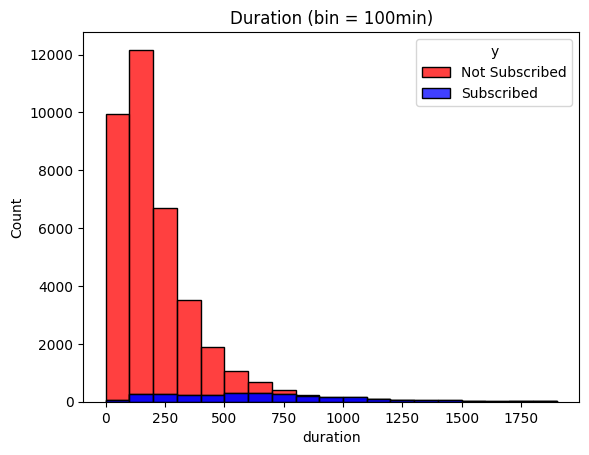

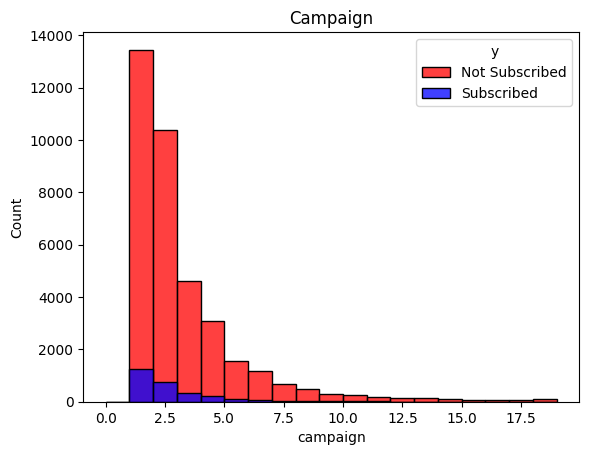

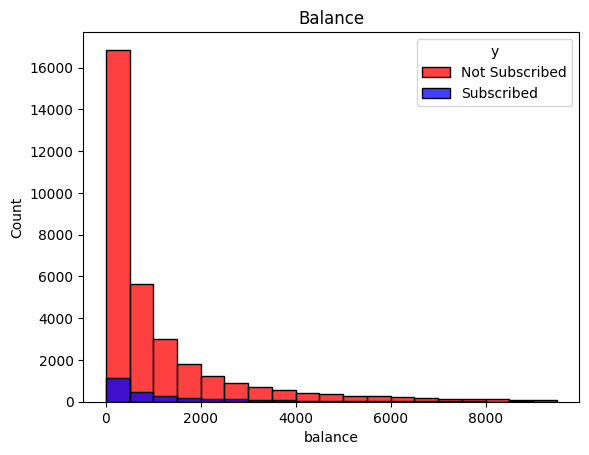

In [ ]:

sns.histplot(data=df[df["y"]==0], x="duration", color='red', label ='Not Subscribed', bins = list(range(0, 2000,100 )))
sns.histplot(data=df[df["y"]==1], x="duration", color='blue', bins = list(range(0, 2000,100 )))
sns.histplot(data=df[df["y"]==1], x="duration", color='blue', label ='Subscribed', bins = list(range(0, 2000,100 )))
plt.title('Duration (bin = 100min)')
plt.legend(title = 'y')
plt.show()

sns.histplot(data=df[df["y"]==0], x="campaign", color='red', label ='Not Subscribed', bins = list(range(0, 20,1 )))
sns.histplot(data=df[df["y"]==1], x="campaign", color='blue', label ='Subscribed', bins = list(range(0, 20,1 )))
plt.title('Campaign')
plt.legend(title = 'y')
plt.show()

sns.histplot(data=df[df["y"]==0], x="balance", color='red', label ='Not Subscribed', bins = list(range(0, 10000, 500)))
sns.histplot(data=df[df["y"]==1], x="balance", color='blue', label ='Subscribed', bins = list(range(0, 10000, 500)))
plt.title('Balance')
plt.legend(title = 'y')
plt.show()




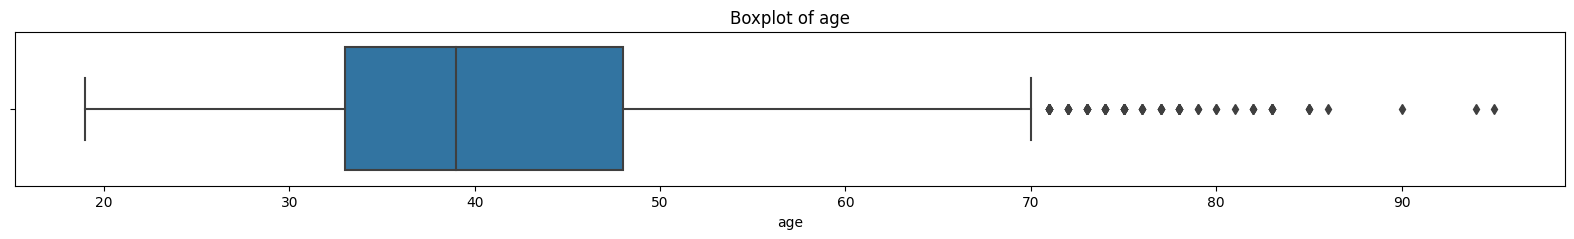

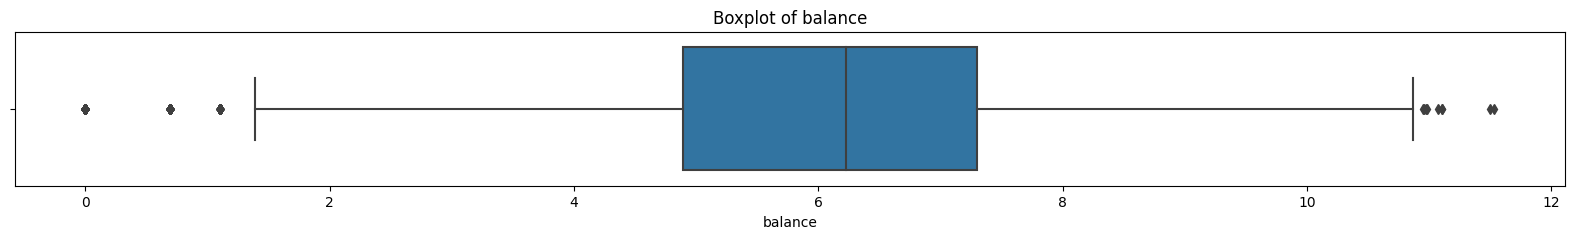

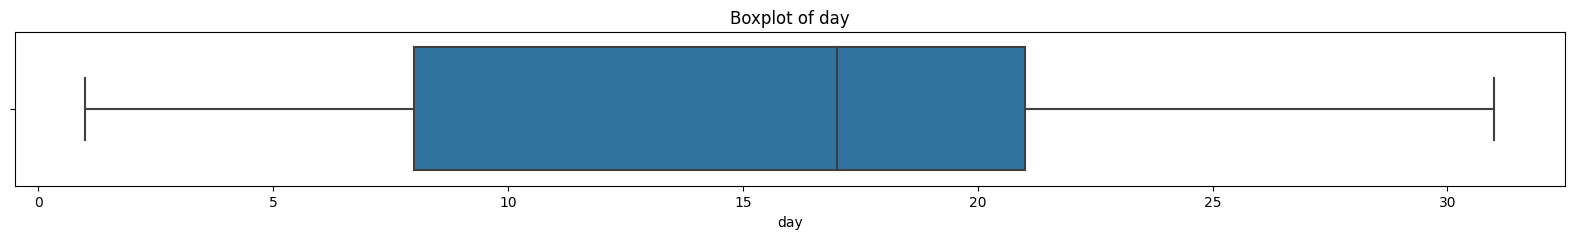

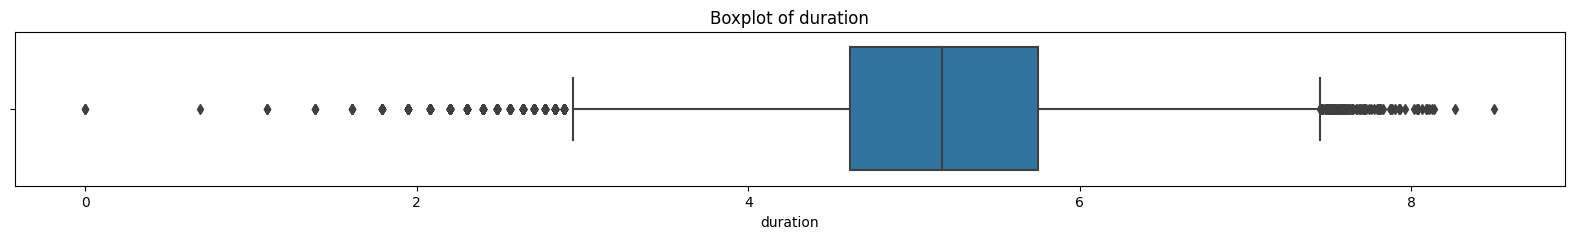

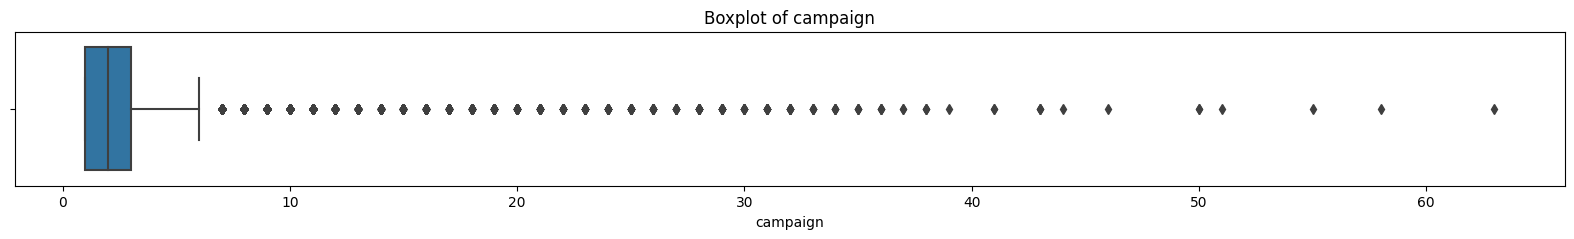

In [91]:
numeric = ['age', 'balance','day','duration', 'campaign']


for feat in df.columns:
  if feat in numeric:
    plt.figure(figsize = (20,2))
    sns.boxplot(x=df[feat])
    plt.title("Boxplot of " + feat)
    plt.show()


**Observation: **

There are few outliers

**Histogram observation**

1. Majority of customers were engaed over call for a duration of 200 mins.
2. Majority of customers were called 1-2 times.
3. Majority of customers keep low average annual balance of under 500 euros.


In [ ]:
#coverting the categorical variables

df = pd.get_dummies(df)

In [85]:
df.corr()

,age,balance,day,duration,campaign,y,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,...,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct
age,1.000000,0.081517,-0.011689,-0.036270,0.016204,-0.020273,-0.047348,-0.028956,0.027956,0.084920,...,0.088125,-0.005046,-0.006882,-0.020452,0.015661,0.085656,0.004259,-0.129909,0.038068,0.002637
balance,0.081517,1.000000,0.011662,0.014072,-0.008137,0.030232,-0.024774,-0.041461,0.011692,0.003044,...,0.006746,-0.001729,-0.006996,-0.028811,-0.069231,0.037525,0.017201,-0.061806,0.138829,0.026811
day,-0.011689,0.011662,1.000000,-0.032983,0.165429,-0.006420,-0.008858,-0.035006,-0.003629,0.005355,...,0.044390,-0.011766,-0.315910,0.270347,0.163457,-0.211740,-0.013673,-0.046278,0.113071,0.041480
duration,-0.036270,0.014072,-0.032983,1.000000,-0.088387,0.461169,-0.008152,0.015951,0.000247,-0.007239,...,-0.041387,-0.008212,-0.013193,0.009830,0.017831,-0.021173,-0.010308,0.014137,-0.004876,0.011327
campaign,0.016204,-0.008137,0.165429,-0.088387,1.000000,-0.040350,-0.020156,-0.004635,-0.002619,0.002804,...,0.176446,-0.010478,-0.032070,-0.067323,0.101728,0.045657,-0.008928,-0.093437,-0.093154,-0.026013
y,-0.020273,0.030232,-0.006420,0.461169,-0.040350,1.000000,0.008083,-0.032859,-0.007191,-0.015248,...,-0.025661,0.000315,0.036816,-0.026922,-0.020528,-0.014557,0.128125,-0.038479,-0.013654,0.093298
job_admin,-0.047348,-0.024774,-0.008858,-0.008152,-0.020156,0.008083,1.000000,-0.196678,-0.067786,-0.059379,...,-0.083899,-0.002009,0.002956,0.003847,0.018822,-0.006272,0.015923,0.034907,-0.006716,0.012477
job_blue-collar,-0.028956,-0.041461,-0.035006,0.015951,-0.004635,-0.032859,-0.196678,1.000000,-0.105624,-0.092525,...,-0.118678,-0.003435,-0.040985,-0.036275,-0.022815,0.022013,-0.035760,0.147611,-0.054234,-0.008935
job_entrepreneur,0.027956,0.011692,-0.003629,0.000247,-0.002619,-0.007191,-0.067786,-0.105624,1.000000,-0.031889,...,-0.048468,-0.003440,0.001374,-0.004266,0.025926,0.015857,-0.011980,-0.017598,0.052979,0.006657
job_housemaid,0.084920,0.003044,0.005355,-0.007239,0.002804,-0.015248,-0.059379,-0.092525,-0.031889,1.000000,...,0.035747,-0.003014,-0.014142,-0.004513,0.041836,0.061572,-0.001942,-0.072383,-0.014389,-0.004040


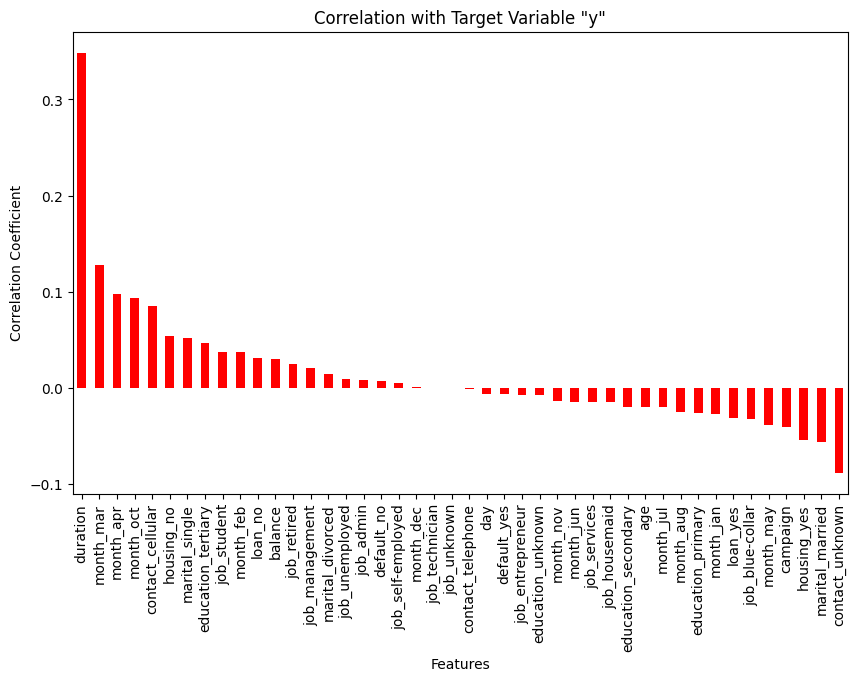

In [88]:
corr = df.corr()['y'].sort_values(ascending = False)[1:]
plt.figure(figsize=(10, 6))
corr.plot(kind='bar', color='red')
plt.title('Correlation with Target Variable "y"')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#sorted_categories2 = df.groupby(label)["y"].median().sort_values(ascending=False).index

In [86]:
df.info()
df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 45 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  40000 non-null  int64
 1   balance              40000 non-null  int64
 2   day                  40000 non-null  int64
 3   duration             40000 non-null  int64
 4   campaign             40000 non-null  int64
 5   y                    40000 non-null  int64
 6   job_admin            40000 non-null  uint8
 7   job_blue-collar      40000 non-null  uint8
 8   job_entrepreneur     40000 non-null  uint8
 9   job_housemaid        40000 non-null  uint8
 10  job_management       40000 non-null  uint8
 11  job_retired          40000 non-null  uint8
 12  job_self-employed    40000 non-null  uint8
 13  job_services         40000 non-null  uint8
 14  job_student          40000 non-null  uint8
 15  job_technician       40000 non-null  uint8
 16  job_unemployed       4

,age,balance,day,duration,campaign,y,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,...,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct
39995,53,395,3,107,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
39996,30,3340,3,238,3,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
39997,54,200,3,170,1,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
39998,34,1047,3,342,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
39999,38,1442,3,113,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [87]:
df['duration'] = np.log1p(df['duration'])

In [90]:
df['balance'] = np.log1p(df['balance'])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning:

divide by zero encountered in log1p

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning:

invalid value encountered in log1p



Best correlation:

Y and Duration - 0.461169 (positive corr)
Contact Cellular and Unknown -
